<a href="https://colab.research.google.com/github/qkrcodus/spotify/blob/main/%EC%8A%A4%ED%8F%AC%ED%8B%B0%ED%8C%8C%EC%9D%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install spotipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.3/250.3 kB 1.3 MB/s eta 0:00:00


In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
client_credentials_manager = SpotifyClientCredentials(client_id='21fec5baa69742ce9e819f76f96ce85f', client_secret='820be0078b454190802213e4948fbdc4')
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)


In [ ]:
artist_name =[]
track_name = []
track_popularity =[]
artist_id =[]
track_id =[]
for i in range(0,1000,50):
    track_results = sp.search(q='year:2023', type='track', limit=50, offset=i)
    for i, t in enumerate(track_results['tracks']['items']):
        artist_name.append(t['artists'][0]['name'])
        artist_id.append(t['artists'][0]['id'])
        track_name.append(t['name'])
        track_id.append(t['id'])
        track_popularity.append(t['popularity'])

In [ ]:
import pandas as pd
track_df = pd.DataFrame({'artist_name' : artist_name, 'track_name' : track_name, 'track_id' : track_id, 'track_popularity' : track_popularity, 'artist_id' : artist_id})
print(track_df.shape)
track_df.head()

(1000, 5)


,artist_name,track_name,track_id,track_popularity,artist_id
0,Mitski,My Love Mine All Mine,3vkCueOmm7xQDoJ17W1Pm3,98,2uYWxilOVlUdk4oV9DvwqK
1,Zach Bryan,I Remember Everything (feat. Kacey Musgraves),4KULAymBBJcPRpk1yO4dOG,93,40ZNYROS4zLfyyBSs2PGe2
2,Jack Harlow,Lovin On Me,4xhsWYTOGcal8zt0J161CU,96,2LIk90788K0zvyj2JJVwkJ
3,Tate McRae,greedy,3rUGC1vUpkDG9CZFHMur1t,100,45dkTj5sMRSjrmBSBeiHym
4,Drake,IDGAF (feat. Yeat),2YSzYUF3jWqb9YP9VXmpjE,93,3TVXtAsR1Inumwj472S9r4


In [ ]:
artist_popularity = []
artist_genres = []
artist_followers =[]
for a_id in track_df.artist_id:
    artist = sp.artist(a_id)
    artist_popularity.append(artist['popularity'])
    artist_genres.append(artist['genres'])
    artist_followers.append(artist['followers']['total'])

In [ ]:
track_df = track_df.assign(artist_popularity=artist_popularity, artist_genres=artist_genres, artist_followers=artist_followers)
track_df.head()

,artist_name,track_name,track_id,track_popularity,artist_id,artist_popularity,artist_genres,artist_followers
0,Mitski,My Love Mine All Mine,3vkCueOmm7xQDoJ17W1Pm3,98,2uYWxilOVlUdk4oV9DvwqK,82,"[brooklyn indie, pov: indie]",6084514
1,Zach Bryan,I Remember Everything (feat. Kacey Musgraves),4KULAymBBJcPRpk1yO4dOG,93,40ZNYROS4zLfyyBSs2PGe2,86,"[classic oklahoma country, modern country pop]",2726390
2,Jack Harlow,Lovin On Me,4xhsWYTOGcal8zt0J161CU,96,2LIk90788K0zvyj2JJVwkJ,83,"[deep underground hip hop, kentucky hip hop, p...",3212893
3,Tate McRae,greedy,3rUGC1vUpkDG9CZFHMur1t,100,45dkTj5sMRSjrmBSBeiHym,83,"[alt z, pop]",4237808
4,Drake,IDGAF (feat. Yeat),2YSzYUF3jWqb9YP9VXmpjE,93,3TVXtAsR1Inumwj472S9r4,95,"[canadian hip hop, canadian pop, hip hop, pop ...",83097633


In [ ]:
track_features = []
for t_id in track_df['track_id']:
    af = sp.audio_features(t_id)
    track_features.append(af)
tf_df = pd.DataFrame(columns = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'url', 'track_href', 'analysis_url', 'duration_ms', 'time_signature'])
for item in track_features:
    for feat in item:
        tf_df = tf_df.append(feat, ignore_index=True)
tf_df.head()

<ipython-input-8-e5c7981cdf8b>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tf_df = tf_df.append(feat, ignore_index=True)
<ipython-input-8-e5c7981cdf8b>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tf_df = tf_df.append(feat, ignore_index=True)
<ipython-input-8-e5c7981cdf8b>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tf_df = tf_df.append(feat, ignore_index=True)
<ipython-input-8-e5c7981cdf8b>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tf_df = tf_df.append(feat, ignore_index=True)
<ipython-input-8-e5c7981cdf8b>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. 

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,url,track_href,analysis_url,duration_ms,time_signature,uri
0,0.504,0.308,9,-14.958,1,0.0321,0.8680,0.135000,0.1580,0.121,113.950,audio_features,3vkCueOmm7xQDoJ17W1Pm3,NaN,https://api.spotify.com/v1/tracks/3vkCueOmm7xQ...,https://api.spotify.com/v1/audio-analysis/3vkC...,137773,4,spotify:track:3vkCueOmm7xQDoJ17W1Pm3
1,0.429,0.453,0,-7.746,1,0.0459,0.5540,0.000002,0.1020,0.155,77.639,audio_features,4KULAymBBJcPRpk1yO4dOG,NaN,https://api.spotify.com/v1/tracks/4KULAymBBJcP...,https://api.spotify.com/v1/audio-analysis/4KUL...,227196,4,spotify:track:4KULAymBBJcPRpk1yO4dOG
2,0.943,0.558,2,-4.911,1,0.0568,0.0026,0.000002,0.0937,0.606,104.983,audio_features,4xhsWYTOGcal8zt0J161CU,NaN,https://api.spotify.com/v1/tracks/4xhsWYTOGcal...,https://api.spotify.com/v1/audio-analysis/4xhs...,138411,4,spotify:track:4xhsWYTOGcal8zt0J161CU
3,0.750,0.733,6,-3.180,0,0.0319,0.2560,0.000000,0.1140,0.844,111.018,audio_features,3rUGC1vUpkDG9CZFHMur1t,NaN,https://api.spotify.com/v1/tracks/3rUGC1vUpkDG...,https://api.spotify.com/v1/audio-analysis/3rUG...,131872,1,spotify:track:3rUGC1vUpkDG9CZFHMur1t
4,0.663,0.670,8,-8.399,1,0.2710,0.0464,0.000089,0.2050,0.138,136.952,audio_features,2YSzYUF3jWqb9YP9VXmpjE,NaN,https://api.spotify.com/v1/tracks/2YSzYUF3jWqb...,https://api.spotify.com/v1/audio-analysis/2YSz...,260111,4,spotify:track:2YSzYUF3jWqb9YP9VXmpjE


In [ ]:
cols_to_drop2 = ['key','mode','type', 'url','track_href','analysis_url']
tf_df = tf_df.drop(columns=cols_to_drop2)
print(track_df.info())
print(tf_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   artist_name        1000 non-null   object
 1   track_name         1000 non-null   object
 2   track_id           1000 non-null   object
 3   track_popularity   1000 non-null   int64 
 4   artist_id          1000 non-null   object
 5   artist_popularity  1000 non-null   int64 
 6   artist_genres      1000 non-null   object
 7   artist_followers   1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      1000 non-null   float64
 1   energy            1000 non-null   float64
 2   loudness          1000 non-null   float64
 3   speechiness       1000 

In [ ]:
track_df['artist_name'] = track_df['artist_name'].astype("string")
track_df['track_name'] = track_df['track_name'].astype("string")
track_df['track_id'] = track_df['track_id'].astype("string")
track_df['artist_id'] = track_df['artist_id'].astype("string")
tf_df['duration_ms'] = pd.to_numeric(tf_df['duration_ms'])
tf_df['instrumentalness'] = pd.to_numeric(tf_df['instrumentalness'])
tf_df['time_signature'] = tf_df['time_signature'].astype("category")
print(track_df.info())
print(tf_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   artist_name        1000 non-null   string
 1   track_name         1000 non-null   string
 2   track_id           1000 non-null   string
 3   track_popularity   1000 non-null   int64 
 4   artist_id          1000 non-null   string
 5   artist_popularity  1000 non-null   int64 
 6   artist_genres      1000 non-null   object
 7   artist_followers   1000 non-null   int64 
dtypes: int64(3), object(1), string(4)
memory usage: 62.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   danceability      1000 non-null   float64 
 1   energy            1000 non-null   float64 
 2   loudness          1000 non-null   float64 
 3   speechi

In [ ]:
track_df.sort_values(by=['track_popularity'], ascending=False)[['track_name', 'artist_name']].head(20)

,track_name,artist_name
3,greedy,Tate McRae
0,My Love Mine All Mine,Mitski
15,Standing Next to You,Jung Kook
16,Strangers,Kenya Grace
27,PERRO NEGRO,Bad Bunny
2,Lovin On Me,Jack Harlow
8,MONACO,Bad Bunny
54,LALA,Myke Towers
34,Que Onda,Calle 24
19,HARLEY QUINN,Fuerza Regida


<ipython-input-13-e41eb44823ed>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sn.heatmap(tf_df.corr(), annot=True)


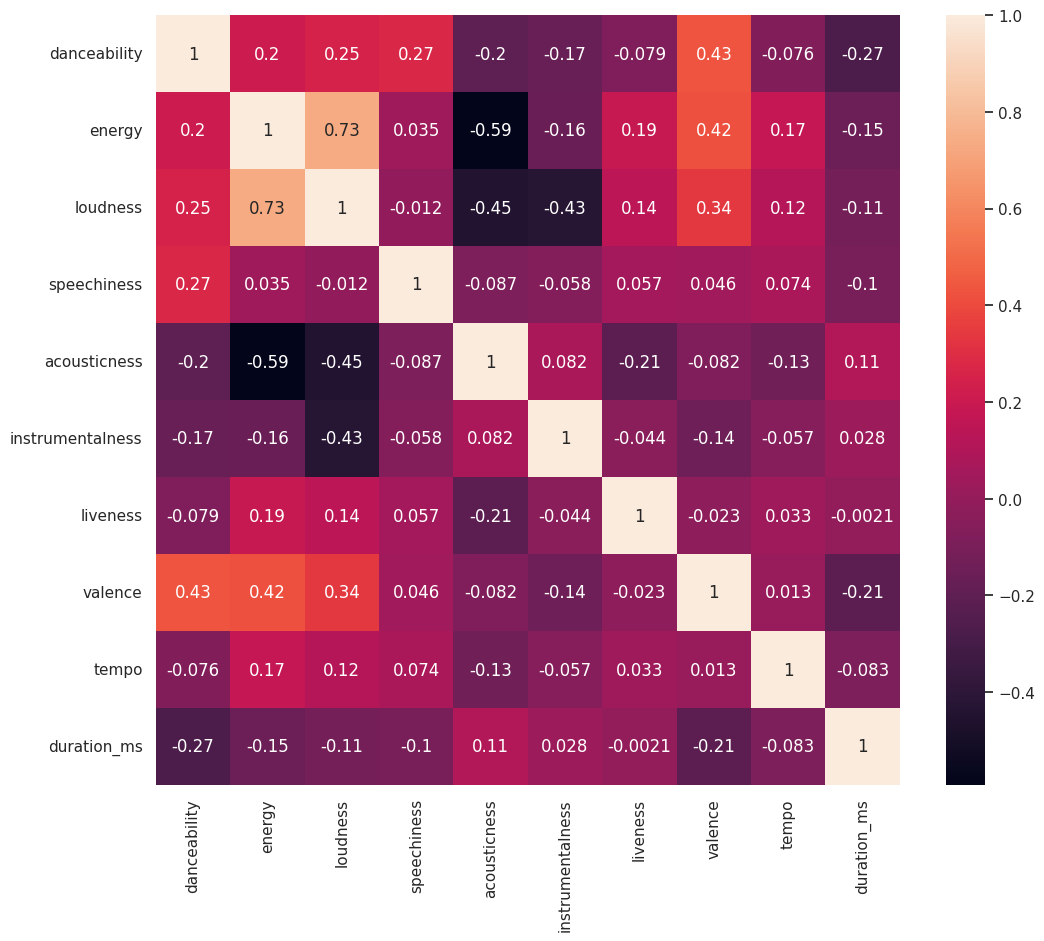

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt
sn.set(rc = {'figure.figsize':(12,10)})
sn.heatmap(tf_df.corr(), annot=True)
plt.show()

In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
client_credentials_manager = SpotifyClientCredentials(client_id='21fec5baa69742ce9e819f76f96ce85f', client_secret='820be0078b454190802213e4948fbdc4')
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
rec = sp.recommendations(seed_artists=["9l8B4GWUQJGownFJs7t2VA"], seed_genres=["house techno"], seed_tracks=["https://open.spotify.com/track/7MXVkk9YMctZqd1Srtv4MB?si=666ef0f7587f407a"], limit=10)
for track in rec['tracks']:
    print(track['artists'][0]['name'], track['name'])

Melanie Martinez Soap
Lauv i'm so tired...
Jason Derulo Want to Want Me
Post Malone One Right Now (with The Weeknd)
Selena Gomez Back To You - From 13 Reasons Why – Season 2 Soundtrack
Chase Atlantic Right Here
The Neighbourhood Daddy Issues
Bruno Mars Talking to the Moon
Kanye West Stronger
Metro Boomin Trance (with Travis Scott & Young Thug)
